In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.2 (main, Mar 12 2024, 08:01:18) [GCC 12.2.0]
Numpy version: 2.1.0
Matplotlib version: 3.9.2


Задача **1**

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией


Text(0, 0.5, 'y')

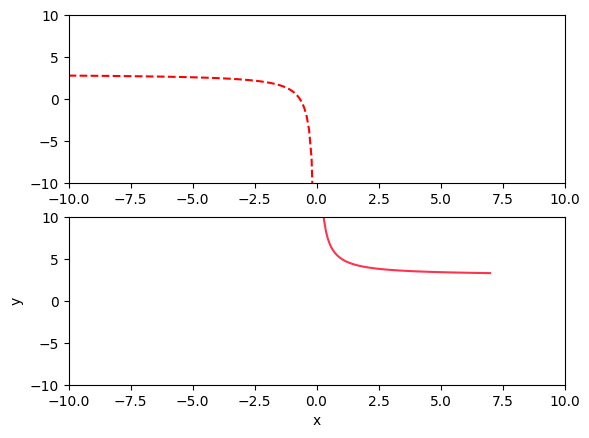

In [57]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def func(x):
  return 2 / x + 3

x1 = np.linspace(-10, 0, 100, endpoint=False)
x2 = np.linspace(0.1, 7, 100)
fig, ax = plt.subplots(2)
ax[0].plot(x1, func(x1), 'r--', label='График для x=[-10;0)')
ax[0].set_xlim(-10, 10)
ax[0].set_ylim(-10, 10)

ax[1].plot(x2, func(x2), color=(1.0,0.2,0.3), label='График для x=[0;7]')
ax[1].set_xlim(-10, 10)
ax[1].set_ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('y')


Задача **2**

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

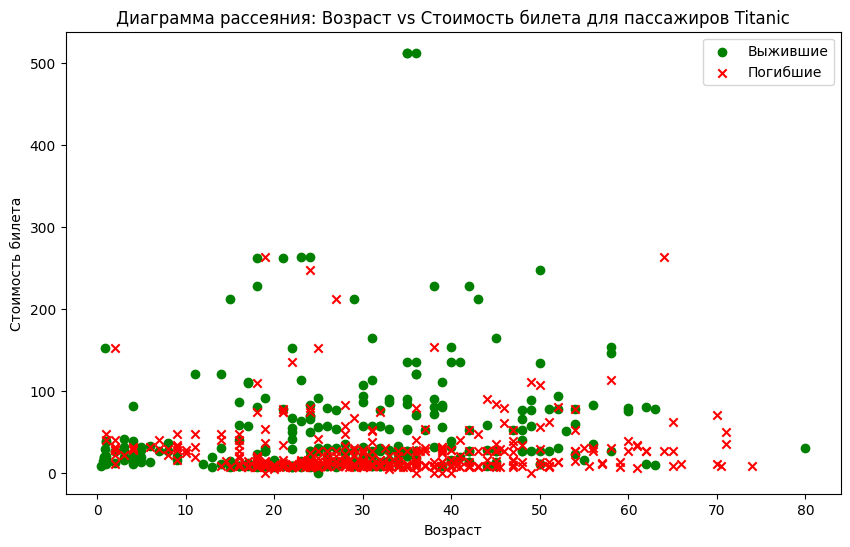

In [58]:
import pandas as pd

titanic_df = pd.read_csv("titanic.csv")

survived = titanic_df[titanic_df['Survived'] == 1]
not_survived = titanic_df[titanic_df['Survived'] == 0]
plt.figure(figsize=(10, 6))
plt.title('Диаграмма рассеяния: Возраст vs Стоимость билета для пассажиров Titanic')
plt.scatter(survived['Age'], survived['Fare'], color='green', marker='o', label='Выжившие')
plt.scatter(not_survived['Age'], not_survived['Fare'], color='red', marker='x', label='Погибшие')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.legend()


Задача **3**

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

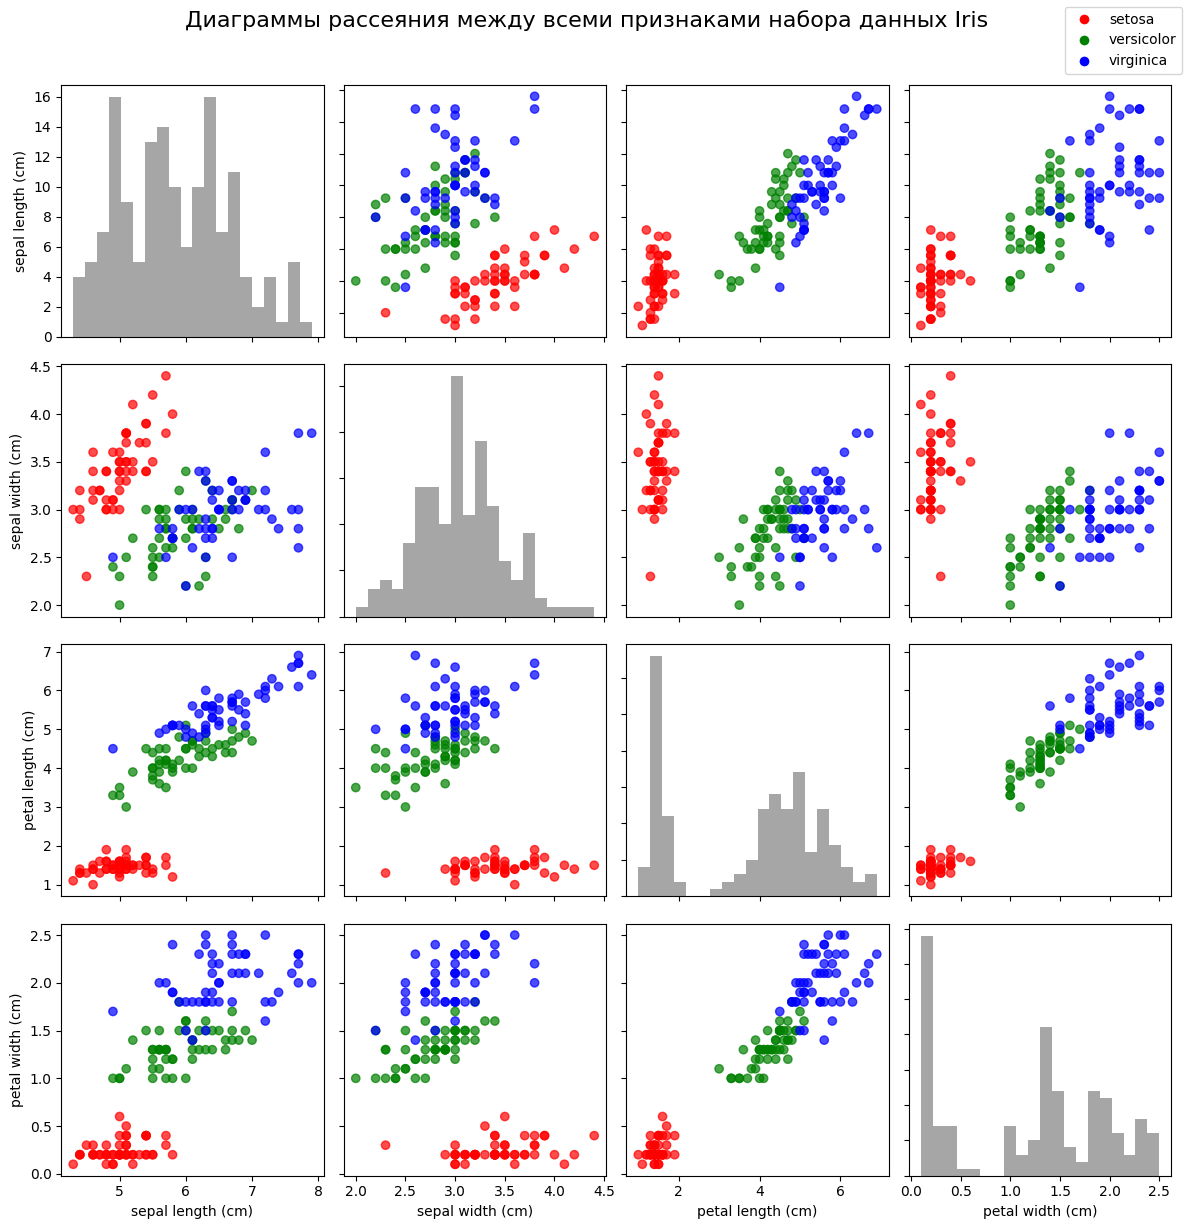

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()

features = iris.feature_names
data = iris.data
target = iris.target
target_names = iris.target_names

# Создание цветовой схемы для различных видов ирисов
colors = ['red', 'green', 'blue']
color_map = [colors[label] for label in target]

# Создание графиков 4x4
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle("Диаграммы рассеяния между всеми признаками набора данных Iris", fontsize=16, y=1.02)

# Построение диаграмм рассеяния для каждой пары признаков
for i in range(4):
  for j in range(4):
    if i == j:
# Диагональные элементы (гистограммы)
      axes[i, j].hist(data[:, i], color='gray', bins=20, alpha=0.7)
      axes[i, j].set_xlabel(features[i])
      axes[i, j].set_ylabel(features[j])
    else:
# Диаграммы рассеяния для каждой пары признаков
      axes[i, j].scatter(data[:, j], data[:, i], c=color_map, marker='o', alpha=0.7)
      axes[i, j].set_xlabel(features[j])
      axes[i, j].set_ylabel(features[i])

# Добавление легенды
for ax in axes.flat:
 ax.label_outer()

# Настройка легенды для всего холста
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=8) for i in range(3)]
fig.legend(handles, target_names, loc='upper right')

plt.tight_layout()
plt.show()


Задача **4**

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

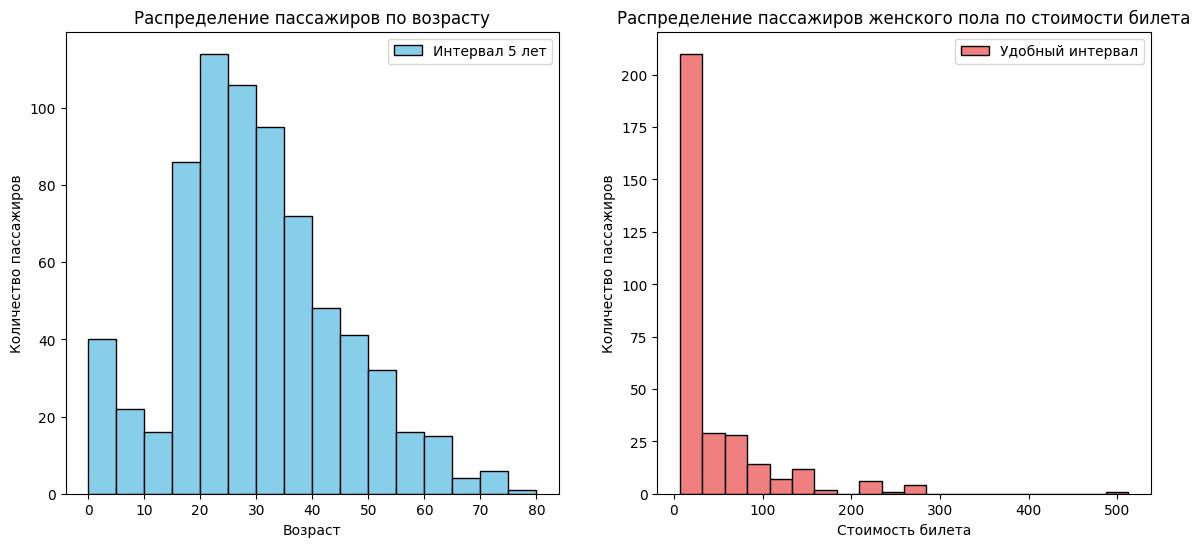

In [61]:
titanic_df = pd.read_csv("titanic.csv")
age_data = titanic_df['Age']
fare_data_female = titanic_df[titanic_df['Sex'] == 'female']['Fare']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(age_data, bins=range(0, 85, 5), color='skyblue', edgecolor='black')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Распределение пассажиров по возрасту')
axes[0].legend(['Интервал 5 лет'])

axes[1].hist(fare_data_female, bins=20, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Стоимость билета')
axes[1].set_ylabel('Количество пассажиров')
axes[1].set_title('Распределение пассажиров женского пола по стоимости билета')
axes[1].legend(['Удобный интервал'])

Задача **5**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


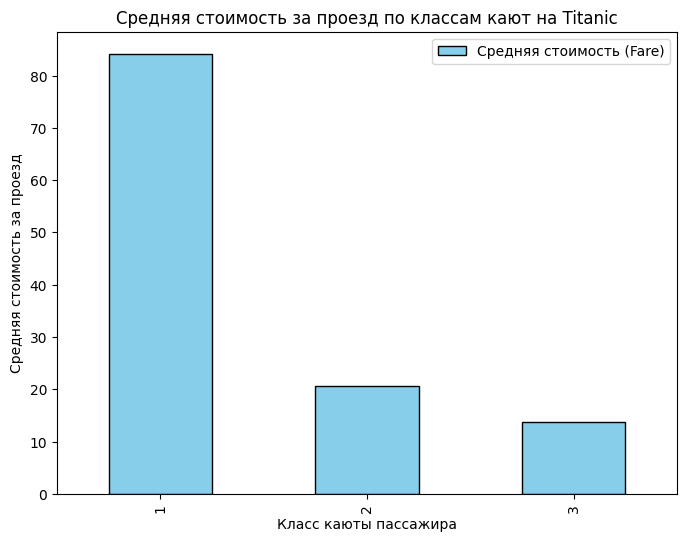

In [63]:
titanic_df = pd.read_csv("titanic.csv")
avg_fare_by_class = titanic_df.groupby('Pclass')['Fare'].mean()
plt.figure(figsize=(8, 6))
avg_fare_by_class.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Класс каюты пассажира')
plt.ylabel('Средняя стоимость за проезд')
plt.title('Средняя стоимость за проезд по классам кают на Titanic')
plt.legend(['Средняя стоимость (Fare)'])

Задача **6**

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


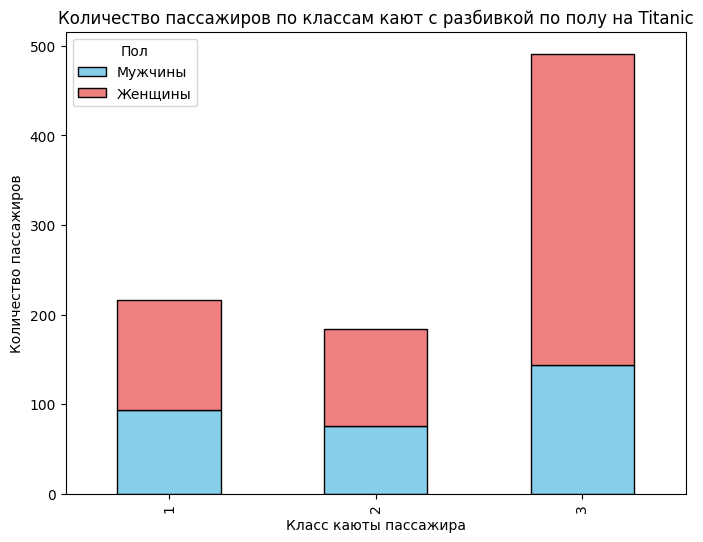

In [79]:
titanic_df = pd.read_csv("titanic.csv")
avg_sex_by_class =titanic_df.groupby(['Pclass', 'Sex']).size().unstack()
avg_sex_by_class.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], edgecolor='black', figsize=(8, 6))
plt.xlabel('Класс каюты пассажира')
plt.ylabel('Количество пассажиров')
plt.title('Количество пассажиров по классам кают с разбивкой по полу на Titanic')
plt.legend(['Мужчины', 'Женщины'], title='Пол')
titanic_df.groupby(['Pclass', 'Sex']).size().unstack()

Задача **7**

Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

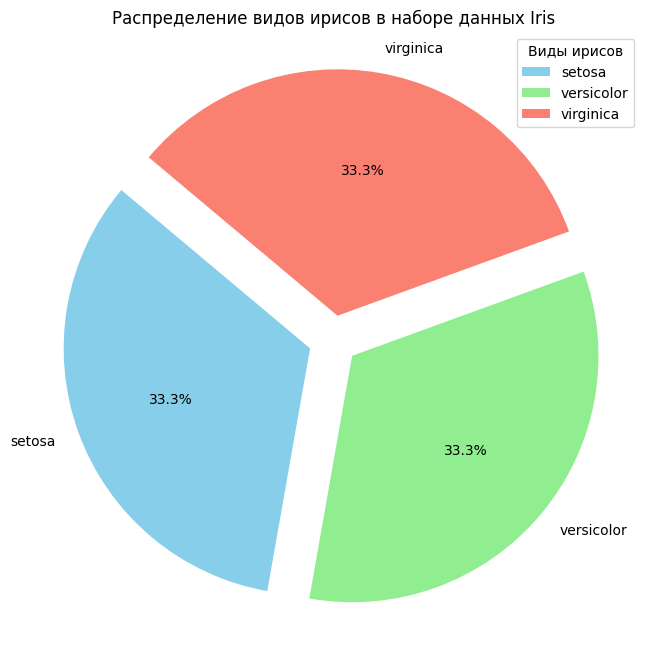

In [80]:
from sklearn.datasets import load_iris
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Подсчет количества ирисов каждого вида
species_counts = iris_df['species'].value_counts()
species_labels = [iris.target_names[i] for i in species_counts.index]

# Настройка "explode" для выделения сектора с максимальной долей
explode = [0.1 if count == species_counts.max() else 0 for count in species_counts]

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_labels, autopct='%1.1f%%', startangle=140, explode=explode, colors=['skyblue', 'lightgreen', 'salmon'])

# Настройки графика
plt.title('Распределение видов ирисов в наборе данных Iris')
plt.legend(species_labels, title="Виды ирисов", loc="upper right")
# Ваш код здесь

Задача **8**

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

Text(0.5, 1.0, 'Распределение возраста пассажиров на Titanic')

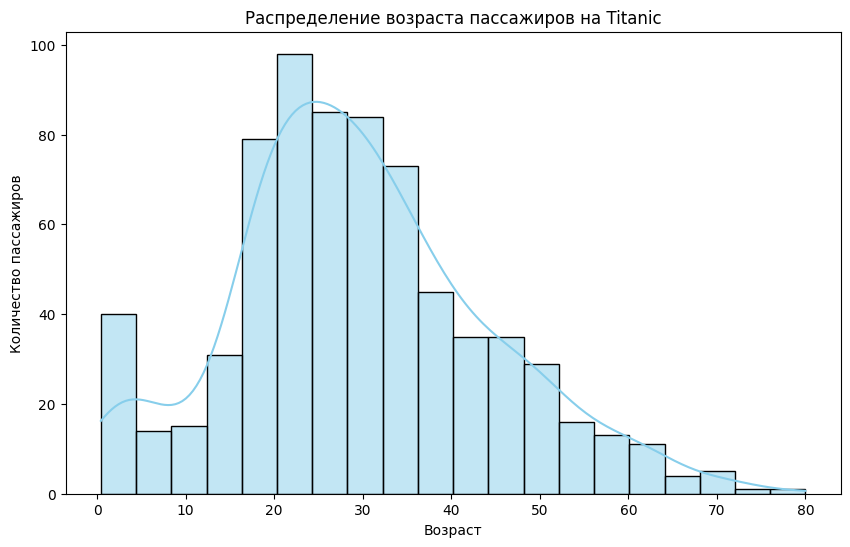

In [81]:
import seaborn as sns

titanic_df = pd.read_csv("titanic.csv")
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], bins=20, kde=True, color='skyblue')

plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возраста пассажиров на Titanic')

## Вопросы


1. Для чего используется диаграмма рассеяния?
2. Что такое гистограмма, чем он отличается от столбчатой диаграммы?
3. Как задать цвет линии в линейном графике Matplotlib?
4. Чем класс plt.Figure отличается от объекта  plt.Axes?
5. Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?
6. Matplotlib единственная библиотека для построения графиков в Python. Да или нет?
7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?
8. В наборе данных iris представлены 4 вида ирисов. Да или нет?
9. Для всех пассажиров "Титаника" указан возраст. Да или нет?
10. Как на одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.